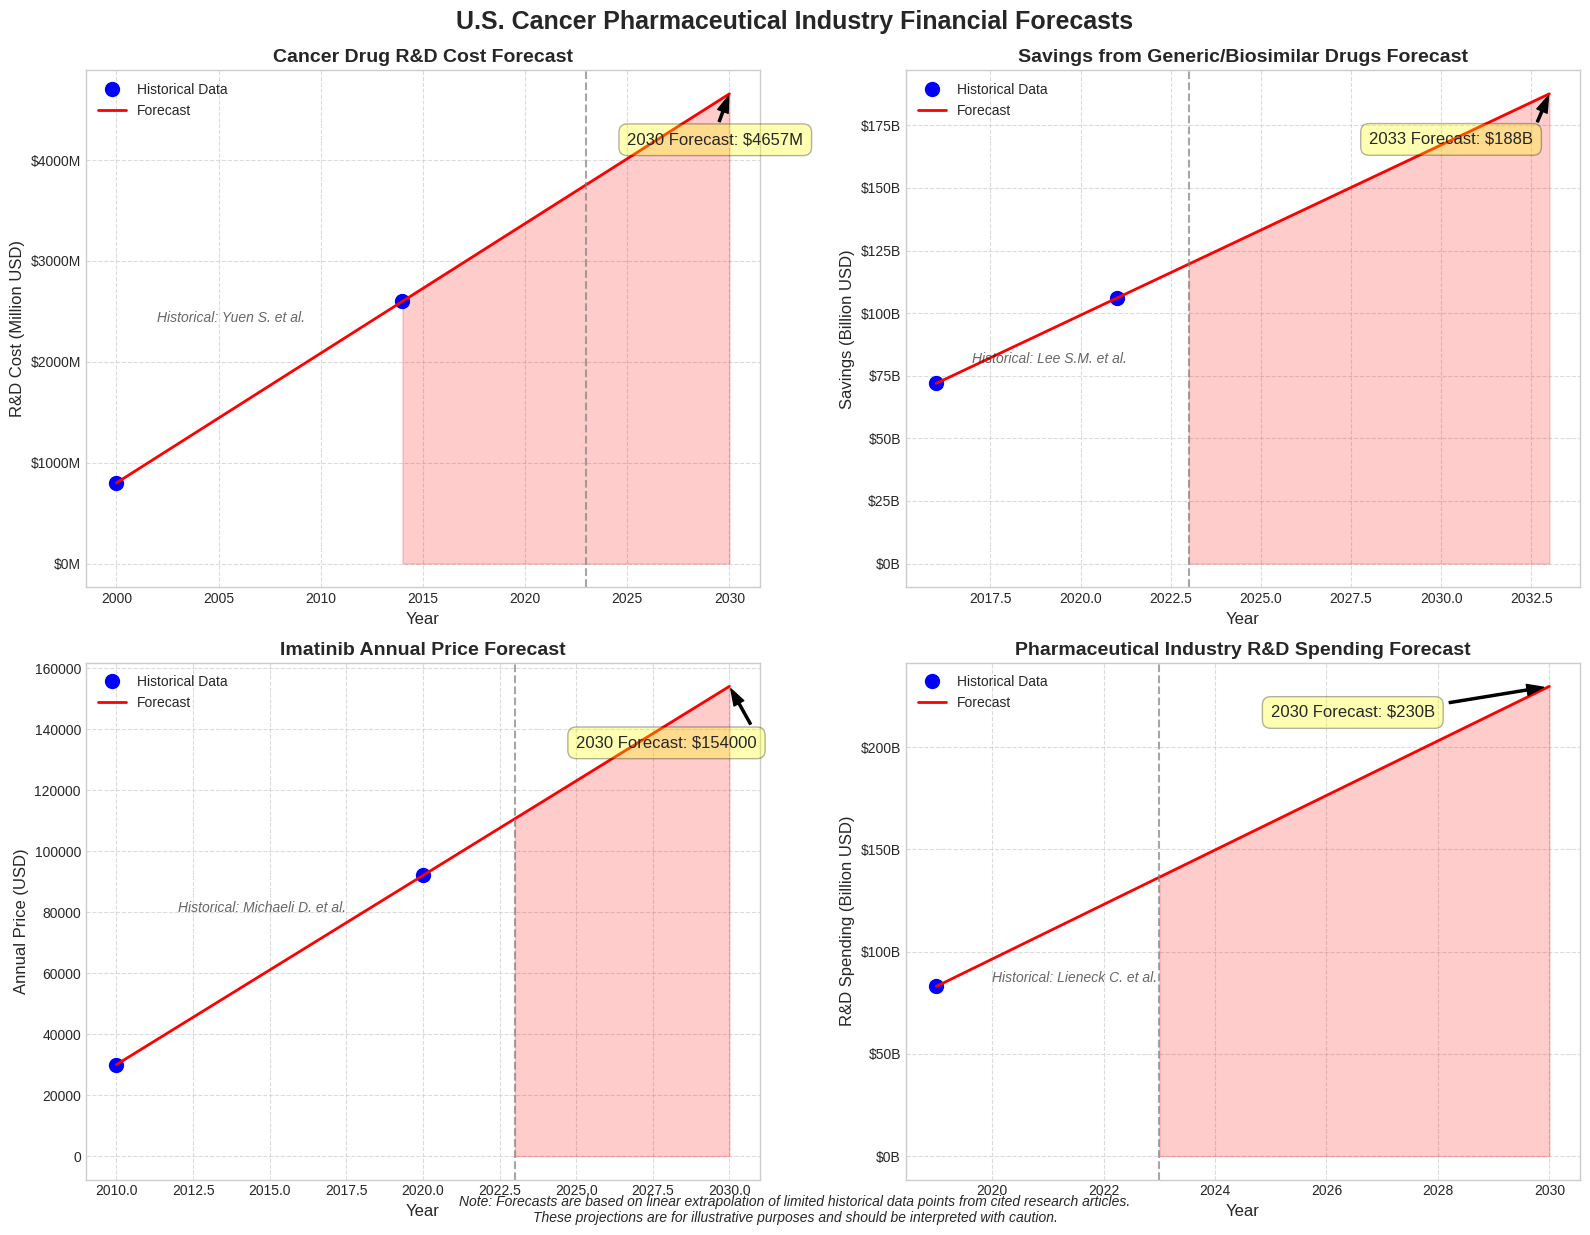

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)

# Format for displaying dollar values in billions
def billions_formatter(x, pos):
    return f'${x:.0f}B'

# Format for displaying dollar values in millions
def millions_formatter(x, pos):
    return f'${x:.0f}M'

# 1. R&D Cost Forecast
# Historical data: R&D costs increasing from "$800 million" (2000) to "$2.6 billion" (2014) - Yuen S. et al.
years_rd = np.array([2000, 2014]).reshape(-1, 1)
costs_rd = np.array([800, 2600])  # in millions USD

# Create linear regression model and forecast to 2030
model_rd = LinearRegression()
model_rd.fit(years_rd, costs_rd)
future_years_rd = np.array(range(2000, 2031)).reshape(-1, 1)
forecasted_costs_rd = model_rd.predict(future_years_rd)

# 2. Generic/Biosimilar Savings Forecast
# Savings from generics/biosimilars: "$72 billion" (2014-2018) to "$106 billion" (2019-2023) - Lee S.M. et al.
periods_midpoints = np.array([2016, 2021]).reshape(-1, 1)  # Using midpoints of periods
savings = np.array([72, 106])  # in billions USD

# Create linear regression model and forecast to 2033
model_savings = LinearRegression()
model_savings.fit(periods_midpoints, savings)
future_periods = np.array(range(2016, 2034)).reshape(-1, 1)
forecasted_savings = model_savings.predict(future_periods)

# 3. Imatinib Price Forecast
# Price increased from "$30,000" to "$92,000" over 10 years - Michaeli D. et al.
# Assuming the 10-year period is 2010-2020
years_imatinib = np.array([2010, 2020]).reshape(-1, 1)
prices_imatinib = np.array([30000, 92000])

# Create linear regression model and forecast to 2030
model_imatinib = LinearRegression()
model_imatinib.fit(years_imatinib, prices_imatinib)
future_years_imatinib = np.array(range(2010, 2031)).reshape(-1, 1)
forecasted_prices_imatinib = model_imatinib.predict(future_years_imatinib)

# 4. R&D Spending Forecast
# Only one data point available: "$83 billion" in 2019 - Lieneck C. et al.
# Will use the growth rate from R&D costs to extrapolate
rd_growth_rate = model_rd.coef_[0] / 800  # Annual growth rate based on R&D cost trend
years_spending = np.array(range(2019, 2031))
spending_2019 = 83  # in billions USD
forecasted_spending = np.array([spending_2019 * (1 + (year - 2019) * rd_growth_rate) for year in years_spending])

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: R&D Cost Forecast
axs[0, 0].plot(years_rd.flatten(), costs_rd, 'o', markersize=10, color='blue', label='Historical Data')
axs[0, 0].plot(future_years_rd.flatten(), forecasted_costs_rd, '-', linewidth=2, color='red', label='Forecast')
axs[0, 0].axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
axs[0, 0].fill_between(future_years_rd.flatten()[14:], 0, forecasted_costs_rd[14:], alpha=0.2, color='red')
axs[0, 0].set_title('Cancer Drug R&D Cost Forecast', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Year', fontsize=12)
axs[0, 0].set_ylabel('R&D Cost (Million USD)', fontsize=12)
axs[0, 0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].legend()
axs[0, 0].text(2002, 2400, 'Historical: Yuen S. et al.', fontsize=10, style='italic', alpha=0.7)
# Annotate forecast
forecast_2030 = forecasted_costs_rd[-1]
axs[0, 0].annotate(f'2030 Forecast: ${forecast_2030:.0f}M',
                  xy=(2030, forecast_2030), xytext=(2025, forecast_2030-500),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                  fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 2: Generic/Biosimilar Savings Forecast
axs[0, 1].plot(periods_midpoints.flatten(), savings, 'o', markersize=10, color='blue', label='Historical Data')
axs[0, 1].plot(future_periods.flatten(), forecasted_savings, '-', linewidth=2, color='red', label='Forecast')
axs[0, 1].axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
axs[0, 1].fill_between(future_periods.flatten()[7:], 0, forecasted_savings[7:], alpha=0.2, color='red')
axs[0, 1].set_title('Savings from Generic/Biosimilar Drugs Forecast', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Year', fontsize=12)
axs[0, 1].set_ylabel('Savings (Billion USD)', fontsize=12)
axs[0, 1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].legend()
axs[0, 1].text(2017, 80, 'Historical: Lee S.M. et al.', fontsize=10, style='italic', alpha=0.7)
# Annotate forecast
forecast_2033 = forecasted_savings[-1]
axs[0, 1].annotate(f'2033 Forecast: ${forecast_2033:.0f}B',
                  xy=(2033, forecast_2033), xytext=(2028, forecast_2033-20),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                  fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 3: Imatinib Price Forecast
axs[1, 0].plot(years_imatinib.flatten(), prices_imatinib, 'o', markersize=10, color='blue', label='Historical Data')
axs[1, 0].plot(future_years_imatinib.flatten(), forecasted_prices_imatinib, '-', linewidth=2, color='red', label='Forecast')
axs[1, 0].axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
axs[1, 0].fill_between(future_years_imatinib.flatten()[13:], 0, forecasted_prices_imatinib[13:], alpha=0.2, color='red')
axs[1, 0].set_title('Imatinib Annual Price Forecast', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Year', fontsize=12)
axs[1, 0].set_ylabel('Annual Price (USD)', fontsize=12)
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].legend()
axs[1, 0].text(2012, 80000, 'Historical: Michaeli D. et al.', fontsize=10, style='italic', alpha=0.7)
# Annotate forecast
forecast_2030_imatinib = forecasted_prices_imatinib[-1]
axs[1, 0].annotate(f'2030 Forecast: ${forecast_2030_imatinib:.0f}',
                  xy=(2030, forecast_2030_imatinib), xytext=(2025, forecast_2030_imatinib-20000),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                  fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 4: Pharmaceutical Industry R&D Spending Forecast
axs[1, 1].plot(2019, 83, 'o', markersize=10, color='blue', label='Historical Data')
axs[1, 1].plot(years_spending, forecasted_spending, '-', linewidth=2, color='red', label='Forecast')
axs[1, 1].axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
axs[1, 1].fill_between(years_spending[4:], 0, forecasted_spending[4:], alpha=0.2, color='red')
axs[1, 1].set_title('Pharmaceutical Industry R&D Spending Forecast', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Year', fontsize=12)
axs[1, 1].set_ylabel('R&D Spending (Billion USD)', fontsize=12)
axs[1, 1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].legend()
axs[1, 1].text(2020, 85, 'Historical: Lieneck C. et al.', fontsize=10, style='italic', alpha=0.7)
# Annotate forecast
forecast_2030_spending = forecasted_spending[-1]
axs[1, 1].annotate(f'2030 Forecast: ${forecast_2030_spending:.0f}B',
                  xy=(2030, forecast_2030_spending), xytext=(2025, forecast_2030_spending-15),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                  fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Adjust layout and add notes
plt.tight_layout()
plt.suptitle('U.S. Cancer Pharmaceutical Industry Financial Forecasts', fontsize=18, fontweight='bold', y=1.02)

# Add forecasting methodology note
fig.text(0.5, 0.01,
         'Note: Forecasts are based on linear extrapolation of limited historical data points from cited research articles.\n'
         'These projections are for illustrative purposes and should be interpreted with caution.',
         ha='center', fontsize=10, style='italic')

plt.savefig('cancer_pharma_financial_forecasts.png', dpi=300, bbox_inches='tight')
plt.show()